# Updating and Importing Packages

In [1]:
!pip install -U transformers
!pip install -U accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from transformers import AutoTokenizer, AutoModelForCausalLM

# Loading dataset

In [3]:
news_df = pd.read_csv('tasnim.xlsx - tasnim.csv')
news_df.dropna(subset=['Label'], inplace=True)

## EDA

In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159 entries, 0 to 1201
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1159 non-null   int64  
 1   Datetime     1159 non-null   object 
 2   Title        1159 non-null   object 
 3   Description  1158 non-null   object 
 4   Link         1159 non-null   object 
 5   Label        1159 non-null   float64
 6   MS           0 non-null      float64
 7   NR           97 non-null     float64
 8   Hard         589 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 90.5+ KB


In [ ]:
news_df.head()

,Unnamed: 0,Datetime,Title,Description,Link,Label,MS,NR,Hard
0,0,1 ساعت پیش,مدیرعامل بورس کالای ایران: به دنبال راه اندازی...,مدیرعامل بورس کالای ایران گفت: به منظور تامین ...,https://www.tasnimnews.com/fa/news/1402/02/16/...,0.0,NaN,NaN,0.0
1,1,1 ساعت پیش,راه‌اندازی سامانه بومی معاملات بورس تا پایان ۱۴۰۲,مدیرعامل شرکت مدیریت فناوری بورس تهران گفت: سا...,https://www.tasnimnews.com/fa/news/1402/02/16/...,0.0,NaN,NaN,0.0
2,2,2 ساعت پیش,مخالفت دولت با واگذاری سهام ۳ شرکت بزرگ به جام...,رئیس سازمان خصوصی سازی با بیان این که برای اخت...,https://www.tasnimnews.com/fa/news/1402/02/16/...,-1.0,NaN,NaN,0.0
3,3,3 ساعت پیش,معافیت افراد تحت پوشش نهادهای حمایتی از مالیات...,رییس کل سازمان امور مالیاتی معافیت مالیاتی واگ...,https://www.tasnimnews.com/fa/news/1402/02/16/...,0.0,NaN,NaN,0.0
4,4,3 ساعت پیش,سود ۱۲ هزار میلیارد تومانی ایران خودرو از عرضه...,مدیرعامل بورس کالای ایران گفت: در سال گذشته شر...,https://www.tasnimnews.com/fa/news/1402/02/16/...,1.0,NaN,NaN,0.0


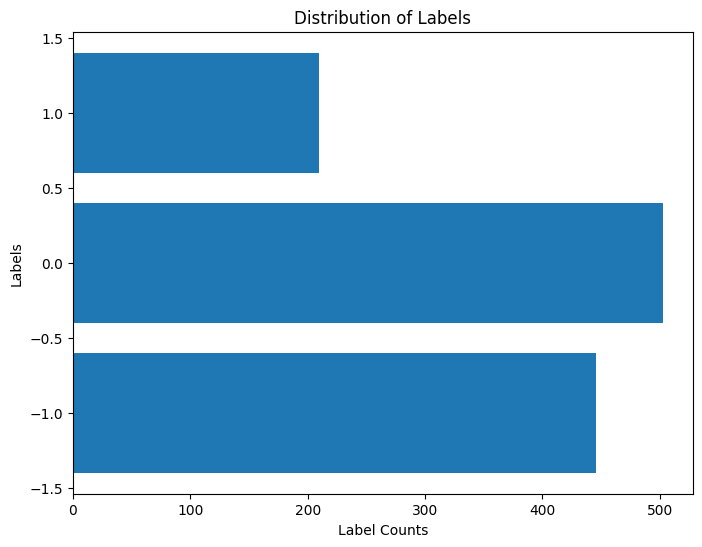

In [ ]:
Label_counts = news_df['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.barh(news_df['Label'].unique(), Label_counts)
plt.xlabel('Label Counts')
plt.ylabel('Labels')
plt.title('Distribution of Labels')
plt.show()

# Loading model

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = AutoModelForCausalLM.from_pretrained(
    "universitytehran/PersianMind-v1.0",
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    device_map={"": device},
)
tokenizer = AutoTokenizer.from_pretrained(
    "universitytehran/PersianMind-v1.0",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/199 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/688k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.50M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/549 [00:00<?, ?B/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [5]:
def create_examples(news_df, example_template, count_per_label, label_map, create_example=True):
    examples = ''
    if create_example:
        for label, label_count in count_per_label.items():
            news_df_with_specific_labels = news_df[news_df['Label'] == float(label)]
            sampled_rows = news_df_with_specific_labels.sample(n=label_count)
            for index, row in sampled_rows.iterrows():
                news_title = row['Title']
                news_description = row['Description']
                news_label = label_map[row['Label']]

                example = example_template.format(
                    title=news_title,
                    description=news_description,
                    label=news_label,
                )
                examples += example
    return examples

def fill_template(TEMPLATE, instruction, examples, title, description):
        model_input = TEMPLATE.format(
        instruction=instruction,
        examples=examples,
        title=title,
        description=description
        )
        return model_input

def classify(model_input):

    input_tokens = tokenizer(model_input, return_tensors="pt")
    input_tokens = input_tokens.to(device)
    generate_ids = model.generate(**input_tokens, max_new_tokens=2, do_sample=False)
    model_output = tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

    return model_output[len(model_input):]

def post_process(model_output, word_mappings):
    model_output = model_output.replace(' ', '').replace('\n', '')
    if model_output in word_mappings.keys():
        model_output = word_mappings[model_output]
    return model_output

def generate_prob_distribution(model_input):
    input_ids = tokenizer.encode(model_input, return_tensors="pt").to('cuda')

    with torch.no_grad():
        outputs = model(input_ids=input_ids)
        next_token_logits = outputs.logits[:, -1, :]
        next_token_probs = torch.softmax(next_token_logits, dim=-1)
    return next_token_probs

def calculate_confidence(model_input, tokens_of_interest):
    next_token_probs = generate_prob_distribution(model_input)
    probs = []
    for token in tokens_of_interest:
        token_id = tokenizer.encode(token)[1]
        token_prob = next_token_probs[0, token_id].item()
        probs.append(token_prob)
    probs.sort(reverse=True)
    conf = (probs[0] - probs[1]) / probs[0]
    return conf

# Defining prompt template

In [6]:
TEMPLATE = "{instruction}\n{examples}Title:{title}\nDescription:{description}\nLabel:"

INSTRUCTION = """I need you to act like a finantial advisor, help me classify these sentences based on their impact on the market.
The labels should be positive/negative/neutral.
Here are a few examples:"""


EXAMPLE_TEMPLATE = "Title:{title}\Description:{description}\nLabel:{label}\n"
COUNT_PER_LABEL = {-1:2, 0:1, 1:2}
LABEL_MAP = {-1:'negative', 0:'neutral', 1:'positive'}
TOKENS_OF_INTEREST = ['negative', 'positive', 'neutral']
WORD_MAPPINGS = {'منفی':'negative', 'مثبت':'positive', 'خنثی':'neutral'}

# Testing model

## Single input

In [ ]:
TITLE = """
شاخص بورس ۳۴هزار واحد رشد کرد
"""
DESCRIPTION = """
شاخص بورس در جریان معاملات امروز بازار سرمایه با رشد ۳۴هزارواحدی روبه‌رو شد.
"""

examples = create_examples(news_df, EXAMPLE_TEMPLATE, COUNT_PER_LABEL, LABEL_MAP)
model_input = fill_template(TEMPLATE, INSTRUCTION, examples, TITLE, DESCRIPTION)
classify(model_input)


'positive'

## Without Examples

In [ ]:
SAMPLE_NUM_PER_LABEL = 100
grouped = news_df.groupby('Label')

test_samples = grouped.apply(lambda x: x.sample(n=SAMPLE_NUM_PER_LABEL))
actual_labels = []
predicted_labels = []
for index, test_sample in test_samples.iterrows():
    test_label = LABEL_MAP[test_sample['Label']]
    test_title = test_sample['Title']
    test_description = test_sample['Description']

    examples = create_examples(news_df, EXAMPLE_TEMPLATE, COUNT_PER_LABEL, LABEL_MAP, False)
    model_input = fill_template(TEMPLATE, INSTRUCTION, examples, test_title, test_description)
    model_output = classify(model_input)
    #print(f'Actual label: {test_label}\nPredicted label: {model_output}')
    #print(100*'-')
    model_output = post_process(model_output, WORD_MAPPINGS)
    actual_labels.append(test_label)
    predicted_labels.append(model_output)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.4` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
report = classification_report(actual_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

    negative       0.75      0.96      0.84       100
     neutral       0.00      0.00      0.00       100
    positive       0.53      0.91      0.67       100
        مثال       0.00      0.00      0.00         0

    accuracy                           0.62       300
   macro avg       0.32      0.47      0.38       300
weighted avg       0.43      0.62      0.50       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

without examples, model doesnt answer neutral, i should try not giving it neutral examples to remove its bias

model needs examples to generate desired labels ( positive, neutral, negative ), can be handled with post processing

## Fair sampling for inputs

## With confidence

In [7]:
SAMPLE_NUM_PER_LABEL = 100
grouped = news_df.groupby('Label')

test_samples = grouped.apply(lambda x: x.sample(n=SAMPLE_NUM_PER_LABEL))
actual_labels = []
predicted_labels = []
pred_actual_labels_with_confs = []
for index, test_sample in test_samples.iterrows():
    test_label = LABEL_MAP[test_sample['Label']]
    test_title = test_sample['Title']
    test_description = test_sample['Description']

    examples = create_examples(news_df, EXAMPLE_TEMPLATE, COUNT_PER_LABEL, LABEL_MAP)
    model_input = fill_template(TEMPLATE, INSTRUCTION, examples, test_title, test_description)
    model_output = classify(model_input)
    model_output = post_process(model_output, WORD_MAPPINGS)
    model_conf = calculate_confidence(model_input, TOKENS_OF_INTEREST)

    actual_labels.append(test_label)
    pred_actual_labels_with_confs.append([test_label, model_output, model_conf])
    predicted_labels.append(model_output)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.4` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [26]:
report = classification_report(actual_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

    negative       0.98      0.54      0.70       100
     neutral       0.53      0.80      0.64       100
    positive       0.76      0.71      0.73       100

    accuracy                           0.68       300
   macro avg       0.76      0.68      0.69       300
weighted avg       0.76      0.68      0.69       300



the model is biased on saying neutral ( high recall )
and its precise in predicting negatives ( very high precision! )

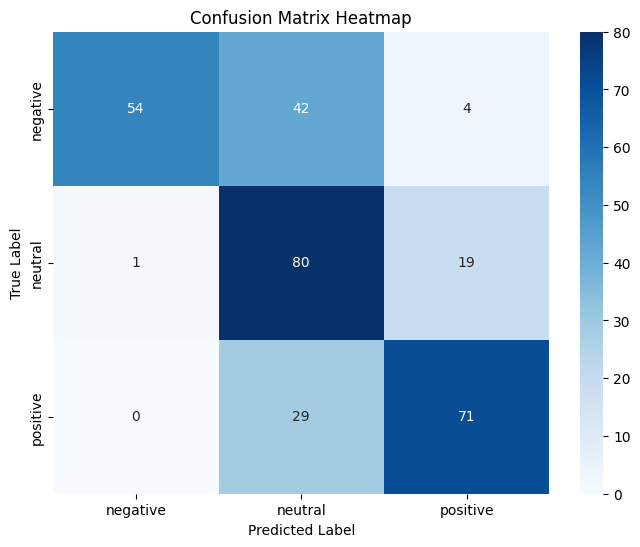

In [25]:
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
unique_labels = sorted(set(actual_labels + predicted_labels))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

### EDA on confidences

In [9]:
df = pd.DataFrame(pred_actual_labels_with_confs, columns=['Actual Label', 'Predicted Label', 'Confidence'])

df.to_csv('sample_data/label_with_confs.csv', index=False)

In [41]:
def plot_hist_for_all_labels(conf_df, labels, true_labels):
    for label in labels:
        if true_labels:
            row_selection = (conf_df['Predicted Label'] == label) & (conf_df['Predicted Label'] == conf_df['Actual Label'])
        else:
            row_selection = (conf_df['Predicted Label'] == label) & (conf_df['Predicted Label'] != conf_df['Actual Label'])
        label_confs = conf_df[row_selection]['Confidence']
        plt.title(f'Confidences for label: {label}')
        plt.hist(label_confs)
        plt.show()

def create_confusion_for_confidences(conf_df, labels):
    sorted_labels = sorted(set(labels))
    confustion_confidence_matrix = []
    for actual_label in sorted_labels:
        matrix_row = []
        for predicted_label in sorted_labels:
            row_selection = (conf_df['Predicted Label'] == predicted_label) & (conf_df['Actual Label'] == actual_label)
            label_conf_mean = conf_df[row_selection]['Confidence'].mean()
            matrix_row.append(label_conf_mean)

        confustion_confidence_matrix.append(matrix_row)
    return confustion_confidence_matrix

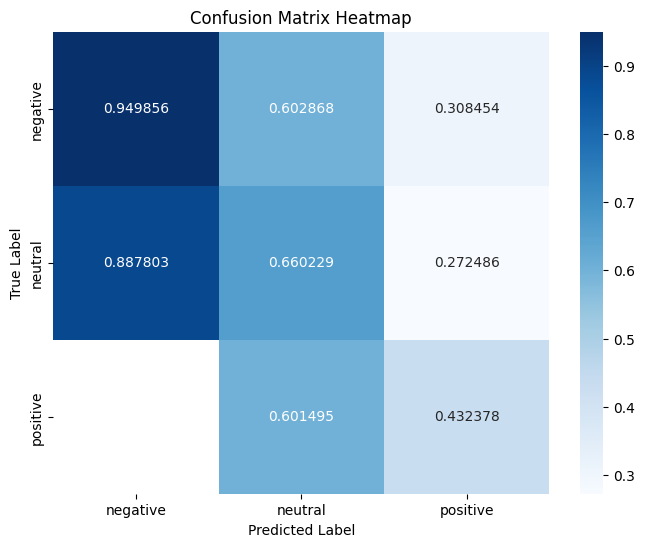

In [42]:
confustion_confidence_matrix = create_confusion_for_confidences(df, TOKENS_OF_INTEREST)
unique_labels = sorted(set(actual_labels + predicted_labels))
plt.figure(figsize=(8, 6))
sns.heatmap(confustion_confidence_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

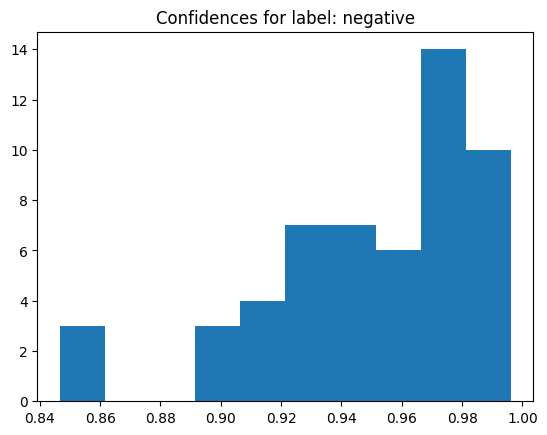

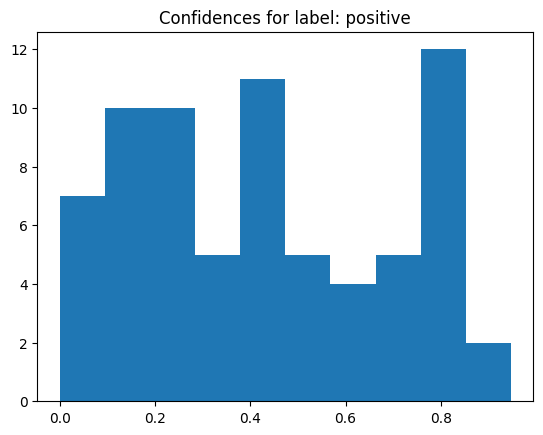

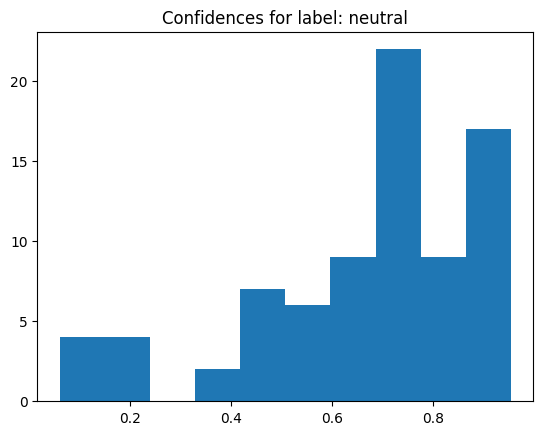

In [28]:
plot_hist_for_all_labels(df, TOKENS_OF_INTEREST, True) # for true labels

model is weak in predicting positive, maybe it needs more example for positive class

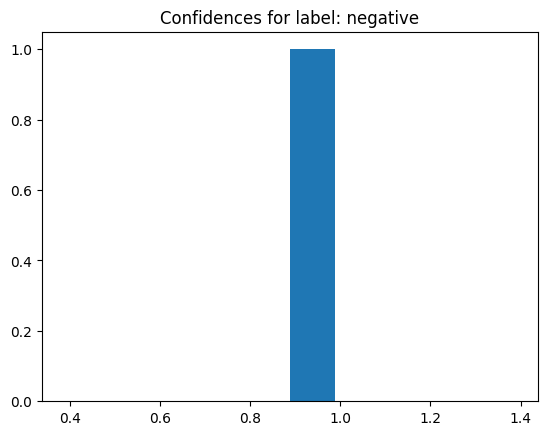

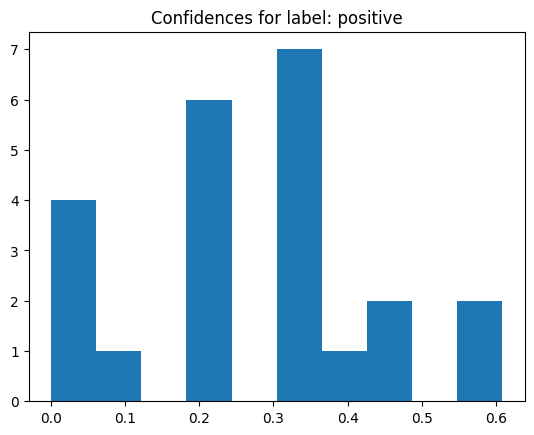

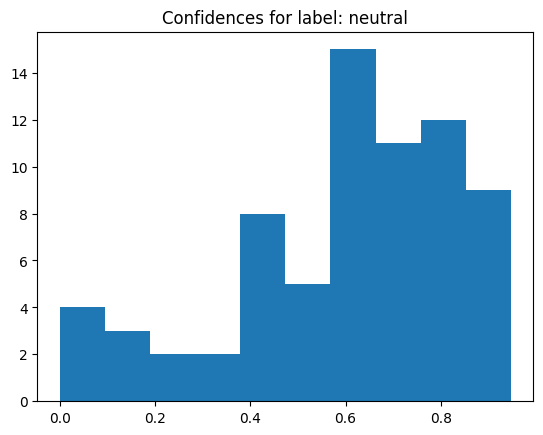

In [30]:
plot_hist_for_all_labels(df, TOKENS_OF_INTEREST, False) # for false labels

the model is biased on predicting neutral and it has high confidence even when getting the wrong answer

but in posotive, the model is not sure itself if the right answer is that when its wrong